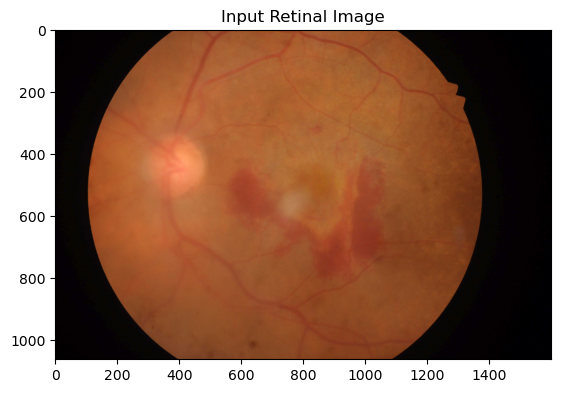

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

# Load and display the input retinal image
image_url = r"C:\Users\ksamy\Desktop\opencv\image.jpg"  # Replace with the actual URL or path to your image
retinal_image = io.imread(image_url)
plt.imshow(retinal_image)
plt.title("Input Retinal Image")
plt.show()

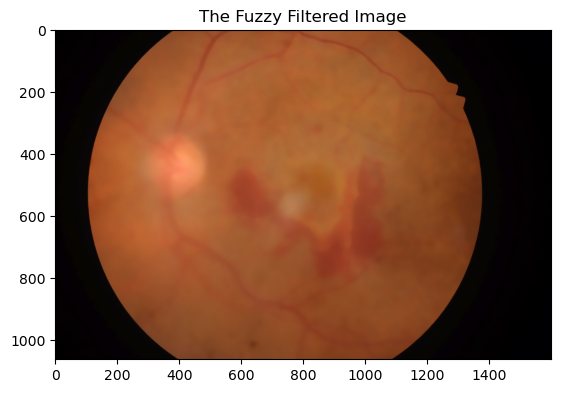

In [4]:
# Apply the fuzzy filter for noise removal without converting to grayscale
def fuzzy_filter(image):
    # Convert the image to BGR format (if it's in RGBA)
    if image.shape[2] == 4:
        image = cv2.cvtColor(image, cv2.COLOR_BGRA2BGR)

    # Apply fuzzy filter
    fuzzy_filtered_image = cv2.fastNlMeansDenoisingColored(image, None, 10, 10, 7, 21)

    return fuzzy_filtered_image

filtered_image = fuzzy_filter(retinal_image)

# Display the noise-removed image
plt.imshow(filtered_image)
plt.title("The Fuzzy Filtered Image")
plt.show()

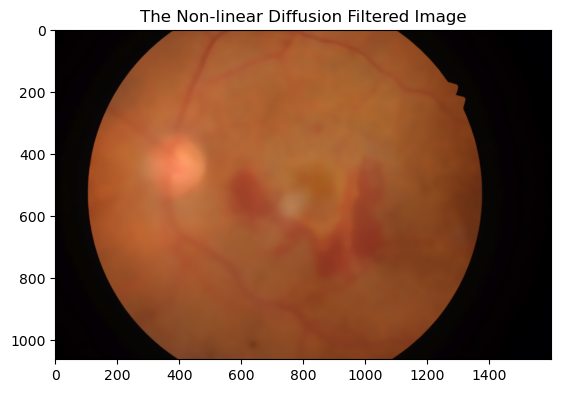

In [5]:
# Apply non-linear diffusion filtering for artifact removal
def non_linear_diffusion_filter(image):
    filtered_image = cv2.fastNlMeansDenoising(image, None, 10, 7, 21)
    return filtered_image

filtered_image = non_linear_diffusion_filter(filtered_image)

# Display the filtered image after non-linear diffusion filtering
plt.imshow(filtered_image, cmap='gray')
plt.title("The Non-linear Diffusion Filtered Image")
plt.show()

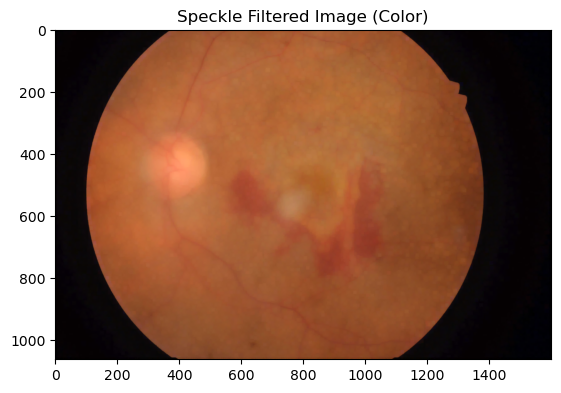

In [6]:
# Convert the image to grayscale
gray_image = cv2.cvtColor(retinal_image, cv2.COLOR_BGR2GRAY)

# Speckle filtering for contrast enhancement using Euclidean distance
def speckle_filter(image, window_size=11, threshold=20):
    half_window = window_size // 2
    output_image = np.copy(image)

    for y in range(half_window, image.shape[0] - half_window):
        for x in range(half_window, image.shape[1] - half_window):
            center_pixel_value = image[y, x]
            window_values = image[y - half_window:y + half_window + 1, x - half_window:x + half_window + 1]
            distances = np.sqrt(np.square(center_pixel_value - window_values))
            avg_distance = np.mean(distances)

            if avg_distance < threshold:
                output_image[y, x] = np.max(window_values)

    return output_image

# Apply speckle filtering to the color image
speckle_filtered_image = np.copy(retinal_image)
for channel in range(3):  # Process each color channel separately
    speckle_filtered_image[:, :, channel] = speckle_filter(retinal_image[:, :, channel])

# Display the speckle filtered image in color
plt.imshow(speckle_filtered_image)
plt.title("Speckle Filtered Image (Color)")
plt.show()

In [15]:
# Convert the image to grayscale
gray_image = cv2.cvtColor(retinal_image, cv2.COLOR_BGR2GRAY)

# Speckle filtering for contrast enhancement using Euclidean distance
def speckle_filter_euclidean(image, window_size=11, threshold=20):
    half_window = window_size // 2
    output_image = np.copy(image)

    for y in range(half_window, image.shape[0] - half_window):
        for x in range(half_window, image.shape[1] - half_window):
            center_pixel_value = image[y, x]
            window_values = image[y - half_window:y + half_window + 1, x - half_window:x + half_window + 1]

            distances = np.sqrt(np.square(center_pixel_value - window_values))
            avg_distance = np.mean(distances)

            if avg_distance < threshold:
                output_image[y, x] = np.max(window_values)

    return output_image

# Calculate the speckle filtered image for Euclidean distance
speckle_filtered_image_euclidean = speckle_filter_euclidean(gray_image)

# Calculate the Euclidean distance between the original and filtered grayscale images
euclidean_distance = np.sqrt(np.sum(np.square(gray_image.astype(np.float64) - speckle_filtered_image_euclidean.astype(np.float64))))

# Calculate the contrast value for Euclidean distance
euclidean_contrast = euclidean_distance / (gray_image.size * gray_image.max())
print(f"Contrast Value (Euclidean Distance): {euclidean_contrast}")

Contrast Value (Euclidean Distance): 3.81232709312504e-05
